In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

### Lab Task 1

In [2]:
"""
1.	Load a low contrast image “wiki.jpg”
2.	Create an algorithm which applies contrast stretching (pick any implementation you like i.e. either formula or points based)
2.1. NOTE: For now, you can select the stretching limits by your own.
3.	Apply same technique on “lowcon.tif”
4.	Summarize your findings on how to extend or automate the task!
"""

img = cv2.imread("lab5_wiki.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("lab5_lowcon.tif", cv2.IMREAD_GRAYSCALE)

# Constrast stretching
# S = ((Smax - Smin) / (Rmax - Rmin)) * (R - Rmin) + Smin
def contrast_stretching(img, rmin, rmax, smin, smax):
    img = ((smax - smin) / (rmax - rmin)) * (img - rmin) + smin
    img = img.astype(np.uint8)
    return img

# empirical values
c_img = contrast_stretching(img, 100, 200, 0, 255)

# Display the image
cv2.imshow("wiki", img)

# Display the image
cv2.imshow("contrast_strecthed", c_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# empirical values
c_img2 = contrast_stretching(img2, 80, 160, 0, 255)

# Display the image
cv2.imshow("lowcon", img2)

# Display the image
cv2.imshow("contrast_strecthed", c_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lab Task 2

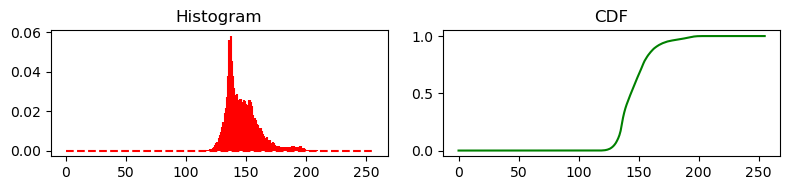

In [4]:
"""
1.	Write a program that equalizes the histogram of a given image. Consider the formula below:
2.	Apply the algorithm on “wiki.jpg” and “lowcon.tif”
2.	Show the comparison of histograms before and after equalization obtained using:
2.1.	Your Implementation of the algorithm
2.2.	OpenCV's implementation of Histogram Equalization
3.	Conclude your findings on following images and analyze the workings of Histogram
3.1.	dark.tif
3.2.	bright.tif
3.3.	lowcon.tif
3.4.	Wiki.jpg
"""

def custom_histogram(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape

    hist = np.zeros(256)

    for i in range(rows):
        for j in range(cols):
            hist[gray[i, j]] += 1
            
    hist /= (rows * cols)
    
    cdf = deepcopy(hist)
    
    for i in range(1, 256):
        cdf[i] += cdf[i-1]
        
    return hist, cdf

img = cv2.imread("lab5_wiki.jpg")
hist, cdf = custom_histogram(img)
plt.rcParams["figure.figsize"] = (8, 2)
plt.subplot(1, 2, 1)
plt.stem(hist, markerfmt='', linefmt='r-', basefmt='r--')
plt.title("Histogram")
plt.subplot(1, 2, 2)
plt.plot(cdf, color='g')
plt.title("CDF")
plt.tight_layout()
plt.show()

In [5]:
def equalize_histogram(img):
    equalized_img = img.copy()

    gray = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    hist, _ = custom_histogram(equalized_img)

    s = np.zeros(256)

    for k in range(1, 256):
        for i in range(k):
            s[k] += hist[i]

    s *= 255
    s = s.astype(np.uint8)

    for i in range(rows):
        for j in range(cols):
            equalized_img[i, j] = s[equalized_img[i, j]]

    return equalized_img

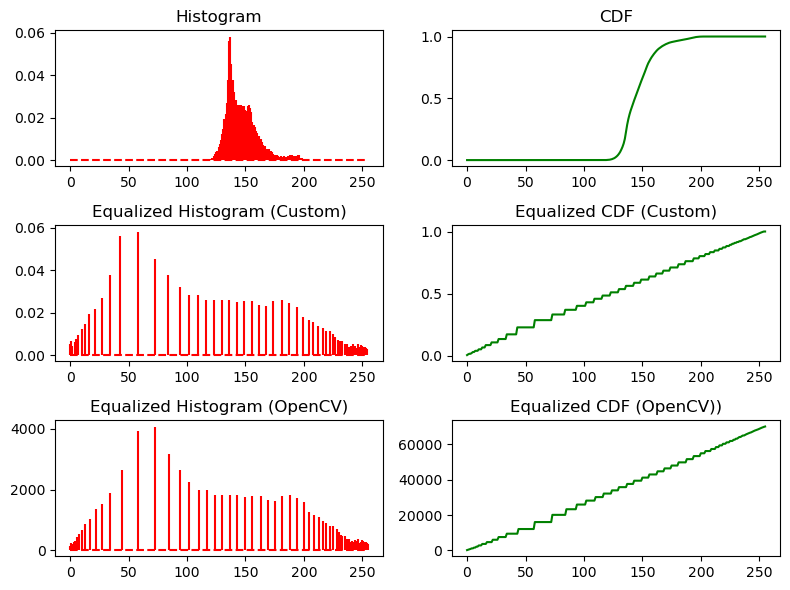

In [6]:
img = cv2.imread("lab5_wiki.jpg")
hist, cdf = custom_histogram(img)
equalized_img = equalize_histogram(img)
eq_hist, eq_cdf = custom_histogram(equalized_img)
plt.rcParams["figure.figsize"] = (8, 6)
plt.subplot(3, 2, 1)
plt.stem(hist, markerfmt="", linefmt="r-", basefmt="r--")
plt.title("Histogram")
plt.subplot(3, 2, 2)
plt.plot(cdf, color="g")
plt.title("CDF")
plt.subplot(3, 2, 3)
plt.stem(eq_hist, markerfmt="", linefmt="r-", basefmt="r--")
plt.title("Equalized Histogram (Custom)")
plt.subplot(3, 2, 4)
plt.plot(eq_cdf, color="g")
plt.title("Equalized CDF (Custom)")

# OpenCV's implementation of Histogram Equalization
img = cv2.imread("lab5_wiki.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray)
hist = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
cdf = np.cumsum(hist)
plt.subplot(3, 2, 5)
plt.stem(hist, markerfmt="", linefmt="r-", basefmt="r--")
plt.title("Equalized Histogram (OpenCV)")
plt.subplot(3, 2, 6)
plt.plot(cdf, color="g")
plt.title("Equalized CDF (OpenCV))")
plt.tight_layout()
plt.show()

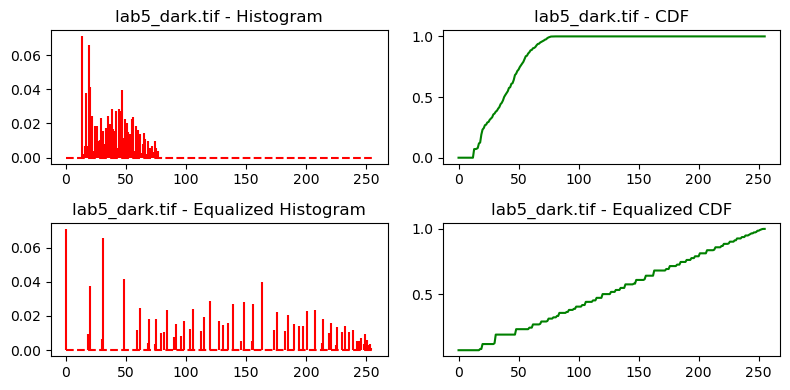

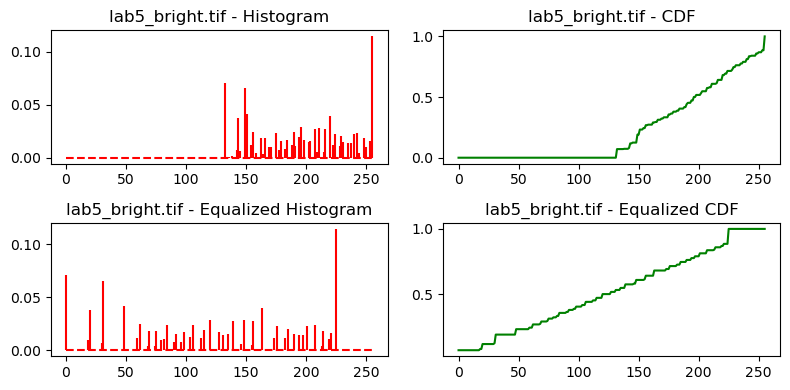

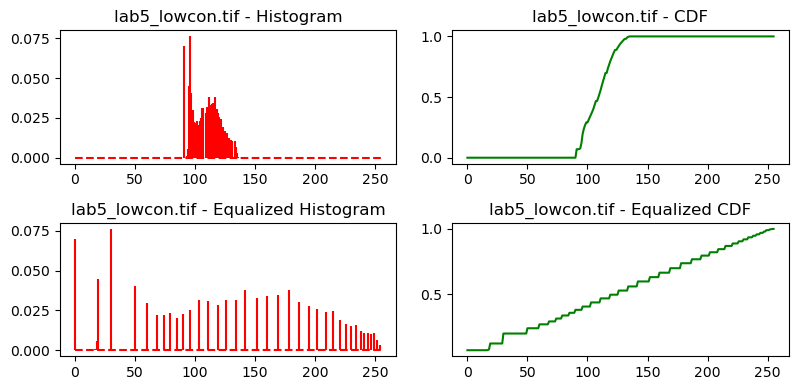

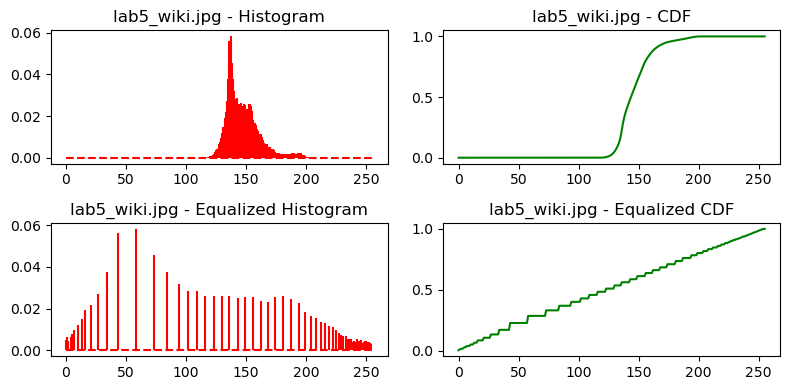

In [7]:
images = ["lab5_dark.tif", "lab5_bright.tif", "lab5_lowcon.tif", "lab5_wiki.jpg"]

for img_name in images:
    img = cv2.imread(img_name)
    hist, cdf = custom_histogram(img)
    equalized_img = equalize_histogram(img)
    eq_hist, eq_cdf = custom_histogram(equalized_img)
    plt.rcParams["figure.figsize"] = (8, 4)
    plt.subplot(2, 2, 1)
    plt.stem(hist, markerfmt="", linefmt="r-", basefmt="r--")
    plt.title(f"{img_name} - Histogram")
    plt.subplot(2, 2, 2)
    plt.plot(cdf, color="g")
    plt.title(f"{img_name} - CDF")
    plt.subplot(2, 2, 3)
    plt.stem(eq_hist, markerfmt="", linefmt="r-", basefmt="r--")
    plt.title(f"{img_name} - Equalized Histogram")
    plt.subplot(2, 2, 4)
    plt.plot(eq_cdf, color="g")
    plt.title(f"{img_name} - Equalized CDF")
    plt.tight_layout()
    plt.show()

### Part 2: Spatial Filtering Basics

Task 1

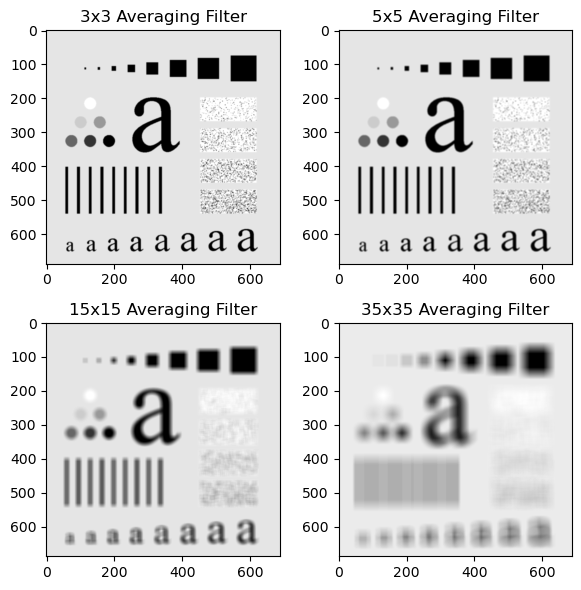

In [8]:
"""
Task #1: Effect of averaging and the size of averaging filters

Consider the following image. Apply averaging with a filter size of 3*3, 5*5, 15*15, and 35*35. A sample 3*3 averaging filter is given below.
What do you observe when increasing the size of the filter and why?
Apply different weighted averaging filters on the same image and note down the effect they have on the input image. One weighted averaging filter is given below.
"""

img = cv2.imread("lab5_smoothing.tif", cv2.IMREAD_GRAYSCALE)

# 3x3 averaging filter
avg_filter = np.ones((3, 3)) / 9
avg_img = cv2.filter2D(img, -1, avg_filter)

# 5x5 averaging filter
avg_filter = np.ones((5, 5)) / 25
avg_img2 = cv2.filter2D(img, -1, avg_filter)

# 15x15 averaging filter
avg_filter = np.ones((15, 15)) / 225
avg_img3 = cv2.filter2D(img, -1, avg_filter)

# 35x35 averaging filter
avg_filter = np.ones((35, 35)) / 1225
avg_img4 = cv2.filter2D(img, -1, avg_filter)

plt.rcParams["figure.figsize"] = (6, 6)
plt.subplot(2, 2, 1)
plt.imshow(avg_img, cmap="gray")
plt.title("3x3 Averaging Filter")
plt.subplot(2, 2, 2)
plt.imshow(avg_img2, cmap="gray")
plt.title("5x5 Averaging Filter")
plt.subplot(2, 2, 3)
plt.imshow(avg_img3, cmap="gray")
plt.title("15x15 Averaging Filter")
plt.subplot(2, 2, 4)
plt.imshow(avg_img4, cmap="gray")
plt.title("35x35 Averaging Filter")
plt.tight_layout()
plt.show()

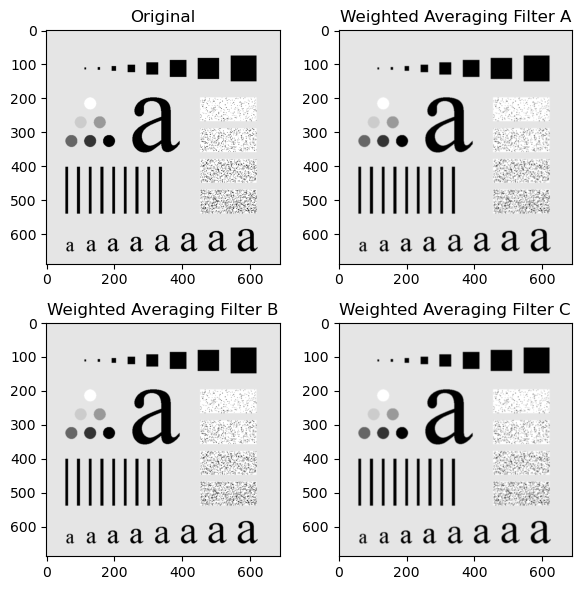

In [9]:
# Different weighted averaging filters
weighted_avg_filterA = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
weighted_avg_filterB = np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]]) / 8
weighted_avg_filterC = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

weighted_avg_imgA = cv2.filter2D(img, -1, weighted_avg_filterA)
weighted_avg_imgB = cv2.filter2D(img, -1, weighted_avg_filterB)
weighted_avg_imgC = cv2.filter2D(img, -1, weighted_avg_filterC)

plt.rcParams["figure.figsize"] = (6, 6)
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(weighted_avg_imgA, cmap="gray")
plt.title("Weighted Averaging Filter A")
plt.subplot(2, 2, 3)
plt.imshow(weighted_avg_imgB, cmap="gray")
plt.title("Weighted Averaging Filter B")
plt.subplot(2, 2, 4)
plt.imshow(weighted_avg_imgC, cmap="gray")
plt.title("Weighted Averaging Filter C")
plt.tight_layout()
plt.show()

Task 2

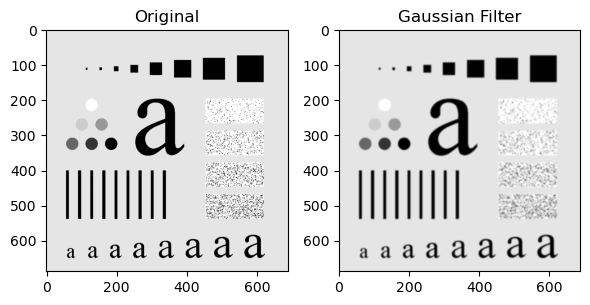

In [10]:
"""
Task #2: Gaussian smoothing

Apply the following Gaussian filter to the image given above. Here, the sigma = 1.4. What impact do you think happen when the value of sigma is increased? Don't forget the normalizing factor while applying the given Gaussian filter.
"""

img = cv2.imread("lab5_smoothing.tif", cv2.IMREAD_GRAYSCALE)

# Gaussian filter 7x7
gaussian_filter = np.array(
    [
        [1, 1, 2, 2, 2, 1, 1],
        [1, 2, 2, 4, 2, 2, 1],
        [2, 2, 4, 8, 4, 2, 2],
        [2, 4, 8, 16, 8, 4, 2],
        [2, 2, 4, 8, 4, 2, 2],
        [1, 2, 2, 4, 2, 2, 1],
        [1, 1, 2, 2, 2, 1, 1],
    ], dtype=np.float32
)
gaussian_filter /= 140

gaussian_img = cv2.filter2D(img, -1, gaussian_filter)

plt.rcParams["figure.figsize"] = (6, 6)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(gaussian_img, cmap="gray")
plt.title("Gaussian Filter")
plt.tight_layout()

Task 3

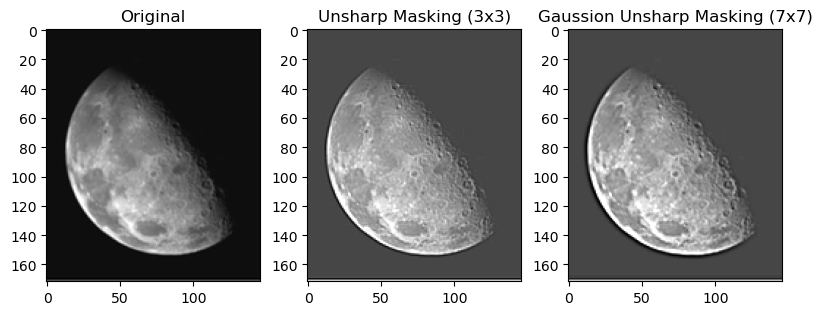

In [25]:
"""
Task #3: Un-sharp Masking 

Perform un-sharp masking on the following image. Does this enhance the image? Try with at least two different smoothing methods. How does that affect the results? 

Unsharp masking is a technique to sharpen images, where a blurred version of an image is subtracted from the image itself. The typical blending formula used for unsharp masking is as follows: sharpened = original + (original - blurred) x amount
"""

img = cv2.imread("lab5_unsharp.png", cv2.IMREAD_GRAYSCALE)

# 3x3 averaging filter
avg_filter = np.ones((3, 3)) / 9
avg_img = cv2.filter2D(img, -1, avg_filter)

# Gaussian filter 7x7
gaussian_filter = np.array(
    [
        [1, 1, 2, 2, 2, 1, 1],
        [1, 2, 2, 4, 2, 2, 1],
        [2, 2, 4, 8, 4, 2, 2],
        [2, 4, 8, 16, 8, 4, 2],
        [2, 2, 4, 8, 4, 2, 2],
        [1, 2, 2, 4, 2, 2, 1],
        [1, 1, 2, 2, 2, 1, 1],
    ], dtype=np.float32
)
gaussian_filter /= 140

gaussian_img = cv2.filter2D(img, -1, gaussian_filter)

# Unsharp masking
unsharp_img = cv2.addWeighted(img, 3, avg_img, -2, 0)
unsharp_img2 = cv2.addWeighted(img, 3, gaussian_img, -2, 0)

plt.rcParams["figure.figsize"] = (8, 6)
plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(2, 3, 2)
plt.imshow(unsharp_img, cmap="gray")
plt.title("Unsharp Masking (3x3)")
plt.subplot(2, 3, 3)
plt.imshow(unsharp_img2, cmap="gray")
plt.title("Gaussion Unsharp Masking (7x7)")
plt.tight_layout()
plt.show()

Task 4

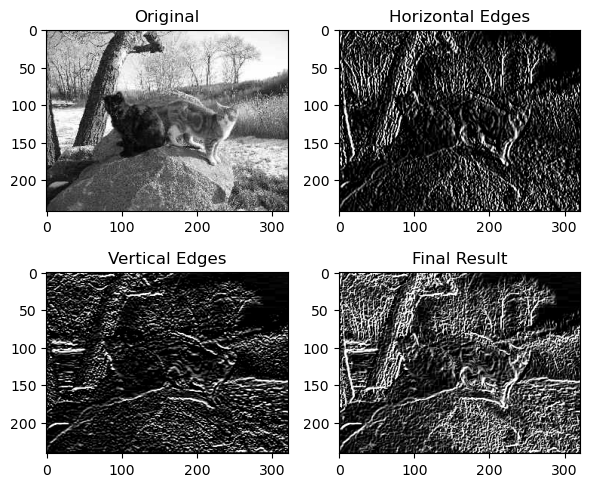

In [3]:
"""
Task #4: Sharpening filters

Download the following image "two_cats.jpg. (A): Use a spatial filter to get the horizontal edges of the image. (B): Use a spatial filter to get the vertical edges of the image. (C): Add the horizontal edge matrix to the vertical edge matrix to yield the following results (the image on the right). 
"""

# Load the image
img = cv2.imread("lab5_two_cats.jpg", cv2.IMREAD_GRAYSCALE)

# Define horizontal and vertical edge detection filters
h_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
v_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply the filters to the image
h_edges = cv2.filter2D(img, -1, h_filter)
v_edges = cv2.filter2D(img, -1, v_filter)

# Add the horizontal and vertical edges to get the final result
edges = cv2.add(h_edges, v_edges)

# Display the result
plt.rcParams["figure.figsize"] = (6, 5)
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(h_edges, cmap="gray")
plt.title("Horizontal Edges")
plt.subplot(2, 2, 3)
plt.imshow(v_edges, cmap="gray")
plt.title("Vertical Edges")
plt.subplot(2, 2, 4)
plt.imshow(edges, cmap="gray")
plt.title("Final Result")
plt.tight_layout()
plt.show()